In [1]:
cd ~/dv/imaging/iMars3D/tests/autorecon/flower/

/SNS/users/lj7/dv/imaging/iMars3D/tests/autorecon/flower


In [2]:
reddir = '/SNSlocal2/__autoreduce.CT-group-7197/'

In [3]:
import os, glob, numpy as np
from imars3d import io
%matplotlib notebook

In [4]:
import matplotlib as mpl
plt = mpl.pyplot

In [5]:
ls {reddir}/

crop/               intensity-fluctuation-correction/  sinogram/
CT_frame_averaged/  median_filtered/                   tilt-correction-0/
find-rot-center/    normalization/                     tilt-correction-1/
gamma-filter/       rot_center                         tomopy-findcenter/


In [6]:
#ls {reddir}/tilt-correction-1

In [7]:
t = io.ImageFile(os.path.join(reddir, 'tilt-correction-1/tiltcorrected_178_405.tiff')).data

<IPython.core.display.Javascript object>


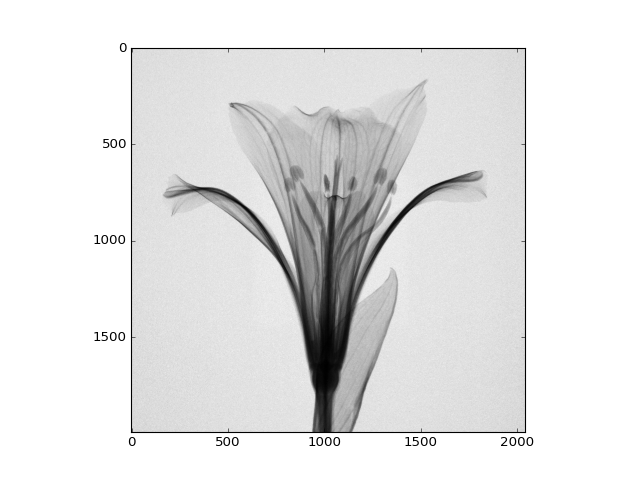

In [8]:
plt.figure()
plt.imshow(t, cmap='gray')

In [9]:
# ls {reddir}/sinogram

In [10]:
sinograms = io.ImageFileSeries(
    os.path.join(reddir, 'sinogram/sinogram_%d.tiff'), 
    range(1992+1), 
)

<IPython.core.display.Javascript object>


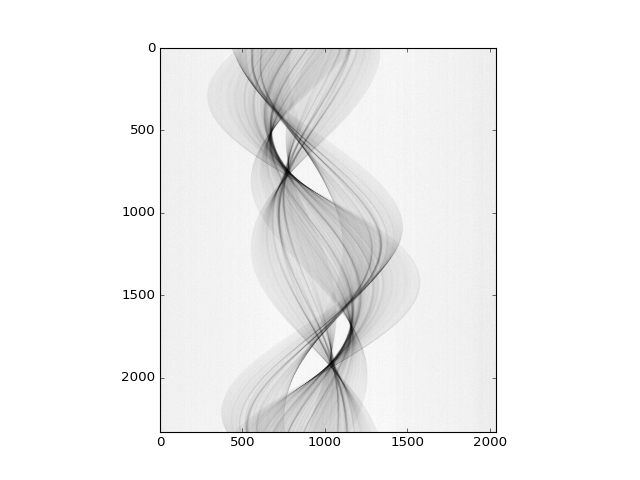

In [11]:
plt.figure()
plt.imshow(sinograms[500].data, cmap='gray')

In [12]:
NSINO = len(sinograms)
sino = [s.data for s in sinograms[NSINO//3: NSINO*2//3]]
# sino = [s.data for s in sinograms]
sino= np.array(sino)
proj = np.swapaxes(sino, 0, 1)
import tomopy
X = proj.shape[-1]

In [13]:
pwd

u'/SNS/users/lj7/dv/imaging/iMars3D/tests/autorecon/flower'

In [14]:
ctdir = os.path.join(reddir, 'tilt-correction-1')

In [15]:
files = glob.glob(os.path.join(ctdir, '*.tiff'))
angles = [float('.'.join(os.path.splitext(os.path.basename(f))[0].split('_')[1:])) for f in files]
angles = sorted(angles)
angles = np.array(angles)

In [16]:
theta = np.deg2rad(angles)

In [17]:
X//2

1020

In [24]:
DEVIATION = 20 # max deviation of rot center from center of image

In [20]:
proj.size

3156124800

In [25]:
dpath=os.path.abspath('tomopy-findcenter')

In [26]:
tomopy.write_center(
    proj, #.copy(), 
    theta,
    cen_range=[X//2-DEVIATION, X//2+DEVIATION, 10],
    dpath=dpath,
    emission=False)

In [27]:
ls tomopy-findcenter/

1000.00.tiff  1060.00.tiff  1150.00.tiff  840.00.tiff  930.00.tiff
1010.00.tiff  1070.00.tiff  1160.00.tiff  850.00.tiff  940.00.tiff
1018.00.tiff  1080.00.tiff  1170.00.tiff  860.00.tiff  950.00.tiff
1019.00.tiff  1090.00.tiff  1180.00.tiff  870.00.tiff  960.00.tiff
1020.00.tiff  1100.00.tiff  1190.00.tiff  880.00.tiff  970.00.tiff
1021.00.tiff  1110.00.tiff  1200.00.tiff  890.00.tiff  980.00.tiff
1030.00.tiff  1120.00.tiff  1210.00.tiff  900.00.tiff  990.00.tiff
1040.00.tiff  1130.00.tiff  820.00.tiff   910.00.tiff
1050.00.tiff  1140.00.tiff  830.00.tiff   920.00.tiff


<IPython.core.display.Javascript object>


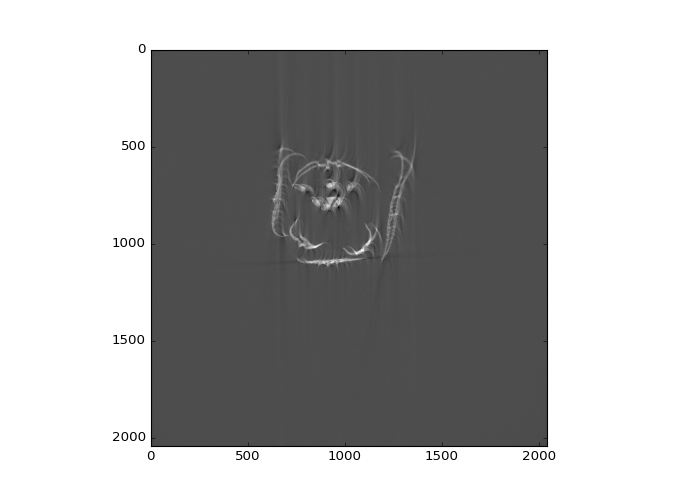

In [31]:
t = io.ImageFile('./tomopy-findcenter/920.00.tiff').data[0]
plt.figure()
plt.imshow(t, cmap='gray')

In [28]:
tomopy.write_center(
    proj, #.copy(), 
    theta,
    cen_range=[910, 930, 1.],
    dpath=dpath,
    emission=False)

<IPython.core.display.Javascript object>


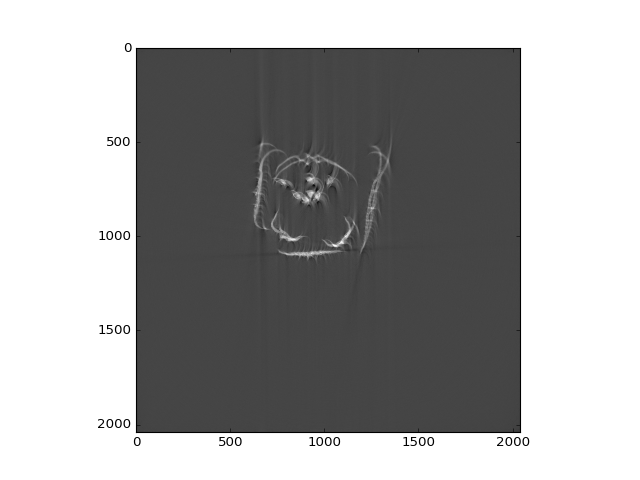

In [32]:
t = io.ImageFile('./tomopy-findcenter/924.00.tiff').data[0]
plt.figure()
plt.imshow(t, cmap='gray')

tilt?

In [39]:
t0 = io.ImageFile(os.path.join(reddir, 'tilt-correction-1/tiltcorrected_000_000.tiff')).data
# plt.figure()
# plt.imshow(t0, cmap='gray')

In [40]:
t180 = io.ImageFile(os.path.join(reddir, 'tilt-correction-1/tiltcorrected_179_955.tiff')).data
# plt.figure()
# plt.imshow(t180, cmap='gray')

In [37]:
flp = np.fliplr(t180)

In [42]:
def shift_diff(x, img1, img2):
    # shift positive means img2 was shifted to the left,
    # or img1 was shifted to the right.
    x = int(x)
    if x>0:
        left = img1[:, :-x]
        right = img2[:, x:]
    elif x<0:
        left = img1[:, -x:]
        right = img2[:, :x]
    else:
        left = img1
        right = img2
    return left-right

<IPython.core.display.Javascript object>


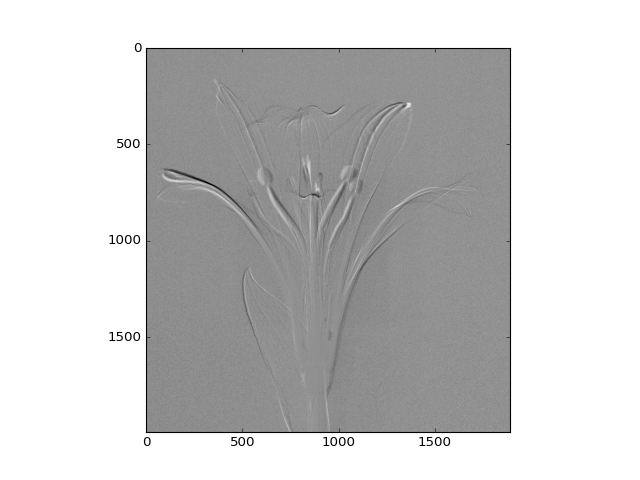

In [49]:
d = shift_diff(150, t0, flp)

plt.figure()
plt.imshow(d, cmap='gray')